In [8]:
import sys
import os
sys.path.append(os.path.abspath("../"))
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.cleaner import DataCleaner
from scripts.eda_stats import EDAAnalyzer
from scripts.visualizer import DataVisualizer
from scripts.loader import DataLoader
from scripts.hypothesis_tests import HypothesisTester
# --- CONFIG ---
FILE_PATH = '../data/MachineLearningRating_v3.txt'

In [9]:
# 1. Load Data
loader = DataLoader(FILE_PATH)
df_raw = loader.load_data()

# 2. Clean Data (Essential for Stats)
cleaner = DataCleaner(df_raw)
cleaner.convert_to_numeric(['TotalPremium', 'TotalClaims']) # Ensure these are floats
cleaner.impute_categorical(['Gender', 'Province', 'PostalCode'])

df = cleaner.get_cleaned_data()
print("Data Ready for Testing.")

🔄 Loading data from ../data/MachineLearningRating_v3.txt...
✅ Data loaded successfully! Shape: (1000100, 52)
Data Ready for Testing.


In [6]:

tester = HypothesisTester(df)

# Run All Tests
tester.test_province_risk()
tester.test_zipcode_risk()
tester.test_margin_difference_zipcodes()
tester.test_gender_risk()


==================== HYPOTHESIS 1: Risk Across Provinces ====================
Test Statistic (Chi2): 104.1967
P-Value: 2.2223e-18
🔴 RESULT: REJECT Null Hypothesis. There is a statistically significant Province Risk Differences.

==================== HYPOTHESIS 2: Risk Between Zip Codes ====================
Comparing Zip Code A (2000.0) vs Zip Code B (122.0)
P-Value: 0.0579
🟢 RESULT: FAIL TO REJECT Null Hypothesis. No significant Risk Difference between 2000.0 and 122.0 found.

==================== HYPOTHESIS 3: Margin Differences (Zip Codes) ====================
Mean Margin A (2000.0): -8.11
Mean Margin B (122.0): -22.86
P-Value: 0.2445
🟢 RESULT: FAIL TO REJECT Null Hypothesis. No significant Margin Difference found.

==================== HYPOTHESIS 4: Risk Women vs Men ====================
P-Value: 0.9515
🟢 RESULT: FAIL TO REJECT Null Hypothesis. No significant Gender Risk Difference found.


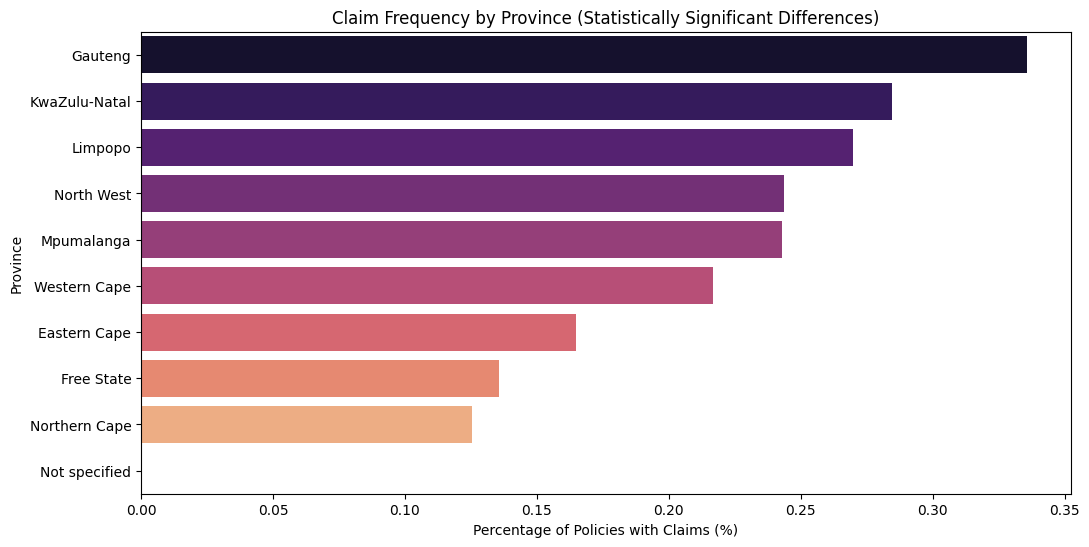

In [ ]:
# Let's visualize the Province Risk since that is usually the most significant
plt.figure(figsize=(12, 6))

# Calculate Claim Frequency per Province
province_risk = df.groupby('Province')['TotalClaims'].apply(lambda x: (x > 0).mean() * 100).reset_index() # type: ignore
province_risk.columns = ['Province', 'ClaimFrequency_Percent']
province_risk = province_risk.sort_values('ClaimFrequency_Percent', ascending=False)

sns.barplot(data=province_risk, x='ClaimFrequency_Percent', y='Province', palette='magma')
plt.title('Claim Frequency by Province (Statistically Significant Differences)')
plt.xlabel('Percentage of Policies with Claims (%)')
plt.show()